# OIP check

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

%matplotlib inline

In [4]:
#version 2014.10
#version 2015.10
cmd= r'"C:\Program Files (x86)\CMG\BR\2014.10\Win_x64\EXE\report.exe"'
os.system(cmd + r' -f run-oip\fhf.rwd -o run-oip\fhf.rwo')

0

# History data読み込み

In [5]:
def RATE(file, rows, rowf, well):
    f = open(file)
    lines = f.readlines()
    f.close

    fin=[]

    list1 = rows
    list2 = rowf
    list3 = well

    for i in range(len(lines)):
        a = lines[i].split()
        for (row1, row2, well) in zip(list1, list2, list3):
            if(i>=row1  and i<row2): 
                a.append(well) 
                fin.append(a)

            
    D=pd.DataFrame(fin)
    D.columns=['TIME', 'DATE', 'OPR', 'WCT', 'BHP', 'WELL']
    D['TIME'] = pd.to_numeric(D['TIME']) 
    D['DATE'] = pd.to_datetime(D['DATE'])
    D['OPR'] = pd.to_numeric(D['OPR'])
    D['WCT'] = pd.to_numeric(D['WCT'])
    D['BHP'] = pd.to_numeric(D['BHP'])

    return D
    
    
#HIST.dtypes
rows = [8, 29, 50, 71, 92, 113, 134, 155, 176, 197, 218]
rowf = [21,42, 63, 84, 105, 126, 147, 168, 189, 210, 231]
well = ['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
HIST = RATE(r'run-oip\fhf.rwo', rows, rowf, well)
HIST.head(3)

,TIME,DATE,OPR,WCT,BHP,WELL
0,0.0,2001-01-01,0.0,0.0,3868.0,J1
1,90.0,2001-04-01,1500.0,0.0,3408.0,J1
2,181.0,2001-07-01,1500.0,0.0,3290.0,J1


In [6]:
HIST['TIMEDIF'] = HIST['TIME'] - HIST['TIME'].shift(1)

zero=[0, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130]
for i in zero:
    HIST.loc[i, 'TIMEDIF']=0
    
HIST['OPT'] = HIST.OPR*HIST.TIMEDIF
HIST['WPR'] = HIST.WCT/(100-HIST.WCT)*HIST.OPR
HIST['WPT'] = HIST.WPR*HIST.TIMEDIF

wj1=HIST[HIST.WELL=='J1'].reset_index(drop=True)
wj2=HIST[HIST.WELL=='J2'].reset_index(drop=True)
wj3=HIST[HIST.WELL=='J3'].reset_index(drop=True)
wj5=HIST[HIST.WELL=='J5'].reset_index(drop=True)
wj6=HIST[HIST.WELL=='J6'].reset_index(drop=True)
wj7=HIST[HIST.WELL=='J7'].reset_index(drop=True)
wa1=HIST[HIST.WELL=='A1'].reset_index(drop=True)
wa2=HIST[HIST.WELL=='A2'].reset_index(drop=True)
wa3=HIST[HIST.WELL=='A3'].reset_index(drop=True)
wa4=HIST[HIST.WELL=='A4'].reset_index(drop=True)
wa5=HIST[HIST.WELL=='A5'].reset_index(drop=True)

cumoil=[wj1.OPT, wj2.OPT, wj3.OPT, wj5.OPT, wj6.OPT, wj7.OPT, wa1.OPT, wa2.OPT, wa3.OPT, wa4.OPT, wa5.OPT]
cumwat=[wj1.WPT, wj2.WPT, wj3.WPT, wj5.WPT, wj6.WPT, wj7.WPT, wa1.WPT, wa2.WPT, wa3.WPT, wa4.WPT, wa5.WPT]
FOPTH=pd.concat(cumoil, axis=1)
FWPTH=pd.concat(cumwat, axis=1)
FOPTH.columns=['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
FWPTH.columns=['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']

FOPTH=FOPTH.assign(
        TOTAL=lambda FOPTH: FOPTH.apply(lambda row: sum(row), axis=1)
    )
FWPTH=FWPTH.assign(
        TOTAL=lambda FWPTH: FWPTH.apply(lambda row: sum(row), axis=1)
    )
FOPTH['DATE'] = wj1.DATE
FWPTH['DATE'] = wj1.DATE
FOPTH['FOPT'] = FOPTH['TOTAL'].copy()
FWPTH['FWPT'] = FWPTH['TOTAL'].copy()
for i in range(1, len(FOPTH)):
    FOPTH.loc[i, 'FOPT'] = FOPTH.loc[i-1, 'FOPT'] + FOPTH.loc[i, 'TOTAL']
    FWPTH.loc[i, 'FWPT'] = FWPTH.loc[i-1, 'FWPT'] + FWPTH.loc[i, 'TOTAL']

FOPTH = FOPTH.set_index('DATE')
FWPTH = FWPTH.set_index('DATE')

FWPTH.head(3)

,J1,J2,J3,J5,J6,J7,A1,A2,A3,A4,A5,TOTAL,FWPT
DATE,,,,,,,,,,,,,
2001-01-01,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2001-04-01,0.0,0.0,1027.918782,0.0,0.0,5394.168467,0.0,0.0,0.0,0.0,0.0,6422.087248,6422.087248
2001-07-01,0.0,0.0,1109.756098,0.0,0.0,5773.861171,0.0,0.0,0.0,0.0,0.0,6883.617269,13305.704517


# CMG data読み込み
* Version 2014.10
* Version 2015.10

In [10]:
def make_rwd(folder, data):
    infile= r'run-oip' + '\\' + data + r'.rwd'
    outfile= r'run-oip' + '\\' + data + r'.rwo'
    cmgrwd=  r'run-oip\CMG.rwd'

    text1 = '*FILE ' + '\'' + folder + '\\' + data +'.irf' + '\''

    with open(cmgrwd) as fwell:
        wellrate = fwell.read()
        

    with open(infile, 'w') as f:
        f.write(text1)
        f.write('\n')
        f.write(wellrate)

    ##############################
    #version 2014.10
    #version 2015.10
    cmd= r'"C:\Program Files (x86)\CMG\BR\2014.10\Win_x64\EXE\report.exe"'
    os.system(cmd + ' -f ' + infile + ' -o ' + outfile)
    

#ff = r'C:\model3\run'
ff = r'C:\CMG2016\GSLIB\003-RUN\run-oip'
    
d1='CASE000-9030-200-CO-SEED190169'
d2='CASE000-9030-200-CO-SEED290169'
d3='CASE000-9030-200-CO-SEED390169'
d4='CASE000-9030-200-CO-SEED490169'
d5='CASE000-9030-200-CO-SEED590169'
d6='CASE000-9030-200-CO-SEED690169'
d7='CASE000-9030-200-CO-SEED790169'
d8='CASE000-9030-200-CO-SEED890169'
d9='CASE000-9030-200-CO-SEED990169'

make_rwd(ff, d1)
make_rwd(ff, d2)
make_rwd(ff, d3)
make_rwd(ff, d4)
make_rwd(ff, d5)
make_rwd(ff, d6)
make_rwd(ff, d7)
make_rwd(ff, d8)
make_rwd(ff, d9)

,SEED,OIP
count,9.000000,9.000000
mean,590169.000000,119.811111
std,273861.278753,0.100056
min,190169.000000,119.660000
25%,390169.000000,119.740000
50%,590169.000000,119.830000
75%,790169.000000,119.880000
max,990169.000000,119.970000


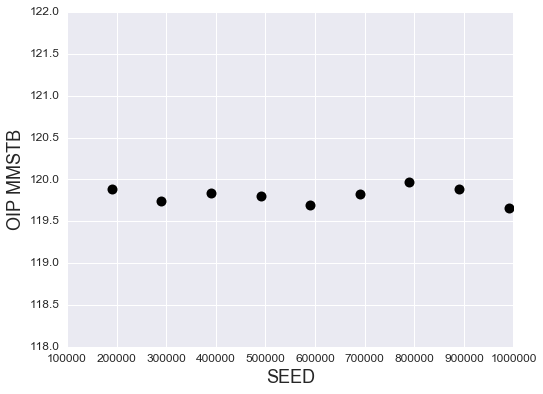

In [15]:
def place(seed, folder, file):
    text = folder + '\\' + file +'.out'
    f = open(text)
    O = f.readlines()
    f.close
    a=O[825].split()
    x=pd.to_numeric(a[7])/1000000
    b=pd.DataFrame({
            'SEED': seed,
            'OIP': np.array([x] )
        })[['SEED', 'OIP']]
    return b

o1=place(190169, ff, d1)
o2=place(290169, ff, d2)
o3=place(390169, ff, d3)
o4=place(490169, ff, d4)
o5=place(590169, ff, d5)
o6=place(690169, ff, d6)
o7=place(790169, ff, d7)
o8=place(890169, ff, d8)
o9=place(990169, ff, d9)

oip=pd.concat([o1, o2, o3, o4, o5, o6, o7, o8, o9])
plt.figure(figsize=(8,6))
plt.plot(oip.SEED, oip.OIP, "ok", ms=10)
plt.xlabel('SEED', fontsize=18)
plt.ylabel('OIP MMSTB', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(118, 122)

plt.savefig("OIP-SEED.PNG")

oip.describe()

In [16]:
def CMG(file):
    s1 = [8, 53, 98, 143, 188, 233, 278, 323, 368, 413, 458]
    f1 = [45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495]
    w1 = ['J1', 'J2', 'J3', 'J5', 'J6', 'J7', 'A1', 'A2', 'A3', 'A4', 'A5']
    text = r'run-oip' + r'\\' + file +'.rwo'
    W = RATE(text, s1, f1, w1)
    
    s2 = [506]
    f2 = [543]
    w2 = ['']
    text = r'run-oip' + r'\\' + file +'.rwo'
    CMG = RATE(text, s2, f2, w2)
    CMG.rename(columns={'OPR': 'OPT', 'WCT': 'WPT', 'BHP': 'AveP'}, inplace=True)
    CMG = CMG.drop('WELL',1)
    CMG = CMG.set_index('DATE')
    
    return (W, CMG)

W1, F1 = CMG(d1)
W2, F2 = CMG(d2)
W3, F3 = CMG(d3)
W4, F4 = CMG(d4)
W5, F5 = CMG(d5)
W6, F6 = CMG(d6)
W7, F7 = CMG(d7)
W8, F8 = CMG(d8)
W9, F9 = CMG(d9)

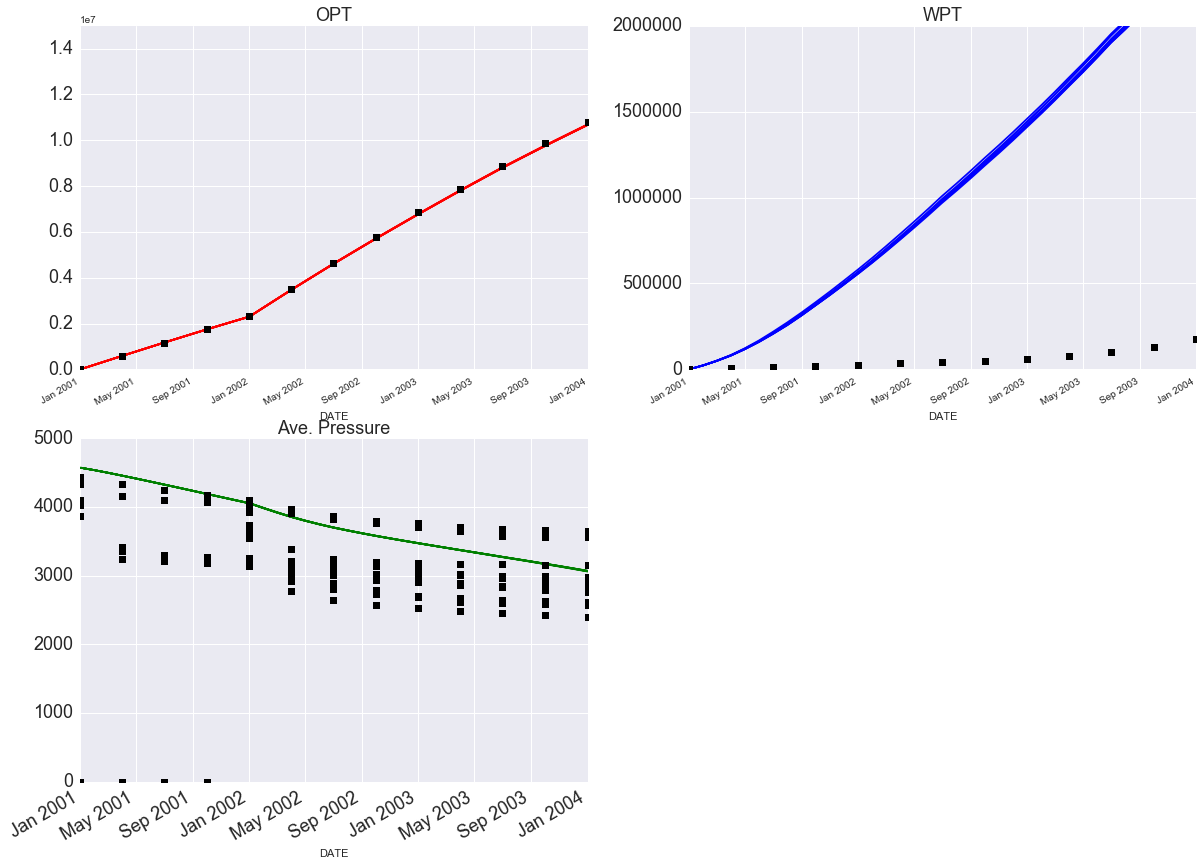

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
F1['OPT'].plot(style='r')
F2['OPT'].plot(style='r')
F3['OPT'].plot(style='r')
F4['OPT'].plot(style='r')
F5['OPT'].plot(style='r')
F6['OPT'].plot(style='r')
F7['OPT'].plot(style='r')
F8['OPT'].plot(style='r')
F9['OPT'].plot(style='r')
FOPTH['FOPT'].plot(style='ks')
plt.ylim([0,1.5e+7])
plt.yticks(fontsize=18)
plt.title('OPT', fontsize=18)

plt.subplot(2, 2, 2)
F1['WPT'].plot(style='b')
F2['WPT'].plot(style='b')
F3['WPT'].plot(style='b')
F4['WPT'].plot(style='b')
F5['WPT'].plot(style='b')
F6['WPT'].plot(style='b')
F7['WPT'].plot(style='b')
F8['WPT'].plot(style='b')
F9['WPT'].plot(style='b')
FWPTH['FWPT'].plot(style='ks')
plt.ylim([0,2.0e+6])
plt.yticks(fontsize=18)
plt.title('WPT', fontsize=18)

plt.subplot(2, 2, 3)
F1['AveP'].plot(style='g')
F2['AveP'].plot(style='g')
F3['AveP'].plot(style='g')
F4['AveP'].plot(style='g')
F5['AveP'].plot(style='g')
F6['AveP'].plot(style='g')
F7['AveP'].plot(style='g')
F8['AveP'].plot(style='g')
F9['AveP'].plot(style='g')
HIST2 = HIST.set_index('DATE')
HIST2['BHP'].plot(style='ks')
plt.ylim([0,5000])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('Ave. Pressure', fontsize=18)

plt.savefig("OIT-WPT-PRE.PNG")